## Задание 3
### Обучение модели YOLO

Требуется обучить модель на основе Humble Yolo распознавать два класса объектов на изображении. 
Исходный код модели есть на GitHub. Требуется изменить создание синтетических данных так, чтобы вместо двух строк использовались два изображения на ваш выбор. Размер, количество и расположение изображений задается случайным образом. 

Результат работы оформите в виде записной книжки Jupyter, в которой должно быть создание синтетических данных, обучение модели и применение модели для обнаружения объектов на тестовых изображениях.

#### Создание синтетических данных

In [2]:
from PIL import Image, ImageDraw
import random
import string
import numpy as np

def one_hot(x, length):
    return [1 if x==i else 0 for i in range(length)]

def get_word(c):
    words = ["Lamba", "Bull", "none"]
    return (words[c], one_hot(c,len(words)))

cell_w = 32
cell_h = 32
grid_w = 2
grid_h = 2

for j in range(0,5000):
    img = Image.new('RGB', (grid_w*cell_w,grid_h*cell_h))
    d = ImageDraw.Draw(img)
    
    with open('Labels/%d.txt' % j,'w+') as f:
     
        for row in range(grid_w):
            for col in range(grid_h):

                (digits, cat) = get_word(random.randint(0,2))

                width = len(digits)*6
                
                if(digits=='none'):
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]) )        
                    f.write('%d %d %d %d\n' % ( col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h ))
                    f.write('0\n') # confidence of object
                    print("None", (col,row), (col*cell_w+cell_w/2, row*cell_h+cell_h/2, cell_w, cell_h), 0)
                elif (digits == 'Lamba'):
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, max(67, (row+1)*cell_h))
                    
                    imageLamba = Image.open(r'C:\Users\Мария\JupyterNotebook_ML\car.png')
                    xCoord = x - width // 2
                    yCoord = y - 10 // 2
                    img.paste(imageLamba, (xCoord, yCoord))
                    
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width, 10) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width, 10), 1)
                else:
                    x = random.randrange(col*cell_w, (col+1)*cell_w)
                    y = random.randrange(row*cell_w, max(67, (row+1)*cell_h))
                    
                    imageBull = Image.open(r'C:\Users\Мария\JupyterNotebook_ML\3.png')
                    xCoord = x - width // 2
                    yCoord = y - 10 // 2
                    img.paste(imageBull, (xCoord, yCoord))
                    
                    f.write('%d %d %d\n' % (cat[0],cat[1],cat[2]))
                    f.write('%d %d %d %d\n' % (x, y, width, 10) )
                    f.write('1\n') # confidence of object
                    print("Objt", (col,row), (x, y, width, 10), 1)
        
        f.write('---\n')

    img.save('Images/%d.PNG' % j)


Objt (0, 0) (8, 53, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 45, 30, 10) 1
Objt (1, 1) (39, 65, 30, 10) 1
Objt (0, 0) (14, 2, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 60, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (31, 62, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 55, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 44, 24, 10) 1
Objt (1, 1) (39, 66, 24, 10) 1
Objt (0, 0) (12, 24, 30, 10) 1
Objt (1, 0) (54, 21, 30, 10) 1
Objt (0, 1) (26, 54, 24, 10) 1
Objt (1, 1) (46, 33, 30, 10) 1
Objt (0, 0) (6, 58, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 48, 24, 10) 1
Objt (1, 1) (50, 54, 30, 10) 1
Objt (0, 0) (8, 46, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 64, 30, 10) 1
Objt (1, 1) (53, 45, 30, 10) 1
Objt (0, 0) (17, 34, 30, 10) 1
Objt (1, 0) (39, 50, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None

Objt (1, 0) (52, 50, 24, 10) 1
Objt (0, 1) (1, 36, 30, 10) 1
Objt (1, 1) (36, 46, 30, 10) 1
Objt (0, 0) (13, 11, 24, 10) 1
Objt (1, 0) (47, 1, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 54, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 45, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 59, 24, 10) 1
Objt (1, 1) (61, 39, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 64, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 46, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 40, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (33, 34, 30, 10) 1
Objt (0, 0) (10, 29, 30, 10) 1
Objt (1, 0) (54, 5, 24, 10) 1
Objt (0, 1) (28, 53, 24, 10) 1
Objt (1, 1) (58, 45, 24, 10) 1
Objt (0, 0) (19, 24, 30, 10) 1
Objt (1, 0) (52, 26, 24, 10) 1
Objt (0, 1) (5, 52, 24, 10) 1
Objt (1, 1) (38, 48, 30, 10) 1
Non

Objt (1, 0) (43, 45, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 65, 30, 10) 1
Objt (0, 0) (11, 7, 24, 10) 1
Objt (1, 0) (44, 14, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (42, 35, 24, 10) 1
Objt (0, 0) (3, 29, 24, 10) 1
Objt (1, 0) (44, 31, 24, 10) 1
Objt (0, 1) (3, 63, 24, 10) 1
Objt (1, 1) (52, 40, 24, 10) 1
Objt (0, 0) (19, 46, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 65, 24, 10) 1
Objt (1, 0) (33, 21, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 42, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 41, 30, 10) 1
Objt (1, 1) (60, 58, 24, 10) 1
Objt (0, 0) (25, 57, 30, 10) 1
Objt (1, 0) (42, 29, 30, 10) 1
Objt (0, 1) (23, 47, 30, 10) 1
Objt (1, 1) (58, 61, 24, 10) 1
Objt (0, 0) (1, 24, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 47, 30, 10) 1
Obj

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 44, 24, 10) 1
Objt (0, 1) (27, 57, 24, 10) 1
Objt (1, 1) (34, 61, 30, 10) 1
Objt (0, 0) (11, 39, 24, 10) 1
Objt (1, 0) (57, 23, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 56, 24, 10) 1
Objt (0, 0) (8, 33, 24, 10) 1
Objt (1, 0) (50, 17, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 11, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 47, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 65, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 38, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 42, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 22, 30, 10) 1
Objt (0, 1) (8, 47, 24, 10) 1
Objt (1, 1) (45, 32, 30, 10) 1
Objt (0, 0) (16, 0, 24, 10) 1
Objt (1, 0) (58, 1, 24, 10) 1
None (0, 1) (16.0, 48.0, 3

Objt (0, 1) (28, 55, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 25, 24, 10) 1
Objt (1, 0) (35, 34, 24, 10) 1
Objt (0, 1) (20, 41, 30, 10) 1
Objt (1, 1) (48, 61, 24, 10) 1
Objt (0, 0) (16, 2, 30, 10) 1
Objt (1, 0) (42, 37, 24, 10) 1
Objt (0, 1) (3, 54, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 36, 24, 10) 1
Objt (1, 0) (61, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (42, 44, 30, 10) 1
Objt (0, 0) (5, 39, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 53, 30, 10) 1
Objt (1, 1) (50, 49, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 35, 24, 10) 1
Objt (0, 1) (18, 65, 24, 10) 1
Objt (1, 1) (32, 35, 30, 10) 1
Objt (0, 0) (31, 48, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 46, 30, 10) 1
Objt (1, 1) (44, 40, 24, 10) 1
Objt (0, 0) (26, 63, 30, 10) 1
Objt (1, 0) (35, 59, 30, 10) 1
Objt (0, 1) (29, 38, 24, 10) 1
Objt (1, 1) (50, 44, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54,

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 20, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 30, 30, 10) 1
Objt (1, 0) (36, 21, 30, 10) 1
Objt (0, 1) (14, 40, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 25, 24, 10) 1
Objt (1, 0) (45, 53, 24, 10) 1
Objt (0, 1) (12, 39, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 59, 30, 10) 1
Objt (1, 0) (32, 59, 30, 10) 1
Objt (0, 1) (19, 32, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 51, 24, 10) 1
Objt (1, 0) (42, 18, 24, 10) 1
Objt (0, 1) (9, 34, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 31, 24, 10) 1
Objt (1, 0) (37, 3, 30, 10) 1
Objt (0, 1) (13, 57, 30, 10) 1
Objt (1, 1) (40, 46, 30, 10) 1
Objt (0, 0) (0, 0, 30, 10) 1
Objt (1, 0) (61, 19, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 51, 24, 10) 1
Objt (0, 0) (17, 27, 30, 10) 1
Objt (1, 0) (42, 24, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1,

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (57, 9, 24, 10) 1
Objt (0, 1) (31, 58, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 34, 30, 10) 1
Objt (1, 1) (49, 42, 24, 10) 1
Objt (0, 0) (0, 64, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 61, 24, 10) 1
Objt (1, 1) (44, 47, 30, 10) 1
Objt (0, 0) (7, 48, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 48, 24, 10) 1
Objt (1, 1) (35, 66, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 16, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 61, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 18, 30, 10) 1
Objt (0, 1) (4, 59, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 44, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (1, 3

Objt (0, 0) (26, 21, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 64, 24, 10) 1
Objt (0, 0) (3, 55, 30, 10) 1
Objt (1, 0) (55, 43, 24, 10) 1
Objt (0, 1) (16, 48, 24, 10) 1
Objt (1, 1) (43, 64, 30, 10) 1
Objt (0, 0) (11, 27, 24, 10) 1
Objt (1, 0) (39, 2, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 49, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 13, 24, 10) 1
Objt (0, 1) (19, 64, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 66, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 55, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 9, 30, 10) 1
Objt (0, 1) (31, 37, 24, 10) 1
Objt (1, 1) (43, 48, 30, 10) 1
Objt (0, 0) (1, 5, 24, 10) 1
Objt (1, 0) (51, 15, 24, 10) 1
Objt (0, 1) (30, 61, 24, 10) 1
Objt (1, 1) (56, 52, 30, 10) 1
Objt (0, 0) (22, 20, 24, 10) 1
Objt (1, 0) (46, 36, 30, 10) 1
Objt (0, 1) (20, 56, 24, 10) 1
Objt (1, 1) 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 53, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 28, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 61, 24, 10) 1
Objt (0, 0) (12, 51, 24, 10) 1
Objt (1, 0) (40, 1, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 35, 30, 10) 1
Objt (0, 0) (20, 6, 24, 10) 1
Objt (1, 0) (52, 30, 24, 10) 1
Objt (0, 1) (29, 41, 24, 10) 1
Objt (1, 1) (60, 54, 30, 10) 1
Objt (0, 0) (25, 38, 24, 10) 1
Objt (1, 0) (63, 54, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 42, 30, 10) 1
Objt (0, 0) (8, 41, 24, 10) 1
Objt (1, 0) (56, 37, 30, 10) 1
Objt (0, 1) (18, 35, 24, 10) 1
Objt (1, 1) (56, 40, 30, 10) 1
Objt (0, 0) (25, 4, 30, 10) 1
Objt (1, 0) (51, 22, 30, 10) 1
Objt (0, 1) (2, 46, 30, 10) 1
Objt (1, 1) (59, 61, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 56, 24, 10) 1
Objt (0, 1) (29, 60, 24, 10) 1
Objt (1, 1) 

Objt (0, 0) (12, 39, 30, 10) 1
Objt (1, 0) (46, 35, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (36, 59, 30, 10) 1
Objt (0, 0) (3, 44, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 35, 30, 10) 1
Objt (1, 1) (59, 57, 24, 10) 1
Objt (0, 0) (1, 59, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 33, 24, 10) 1
Objt (1, 1) (56, 39, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 2, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (36, 38, 24, 10) 1
Objt (0, 0) (17, 66, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (12, 35, 24, 10) 1
Objt (1, 1) (48, 35, 30, 10) 1
Objt (0, 0) (7, 56, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 35, 30, 10) 1
Objt (0, 0) (28, 19, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 36, 30, 10) 1
Objt (1, 1) (48, 39, 24, 10) 1
Objt (0, 0) (24, 12, 24, 10) 1
Objt (1, 0) (41, 28, 30, 10) 1
Objt (0, 1) (24, 55, 30, 10) 1
None (1

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 63, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 44, 24, 10) 1
Objt (0, 1) (5, 34, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 42, 30, 10) 1
Objt (1, 0) (40, 34, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 37, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (40, 21, 24, 10) 1
Objt (0, 1) (31, 54, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 3, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 16, 24, 10) 1
Objt (1, 0) (54, 8, 24, 10) 1
Objt (0, 1) (1, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 16, 30, 10) 1
Objt (1, 0) (35, 2, 30, 10) 1
Objt (0, 1) (2, 52, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 3, 30, 10) 1
Objt (1, 0) (34, 24, 24, 10) 1
Objt (0, 1) (6, 54, 24, 10

Objt (1, 0) (62, 48, 30, 10) 1
Objt (0, 1) (9, 53, 24, 10) 1
Objt (1, 1) (45, 44, 24, 10) 1
Objt (0, 0) (16, 16, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 65, 30, 10) 1
Objt (1, 1) (37, 56, 30, 10) 1
Objt (0, 0) (9, 29, 24, 10) 1
Objt (1, 0) (57, 25, 30, 10) 1
Objt (0, 1) (11, 62, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (16, 6, 30, 10) 1
Objt (1, 0) (34, 42, 24, 10) 1
Objt (0, 1) (8, 62, 24, 10) 1
Objt (1, 1) (36, 66, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 64, 30, 10) 1
Objt (0, 1) (28, 62, 24, 10) 1
Objt (1, 1) (60, 57, 30, 10) 1
Objt (0, 0) (7, 14, 24, 10) 1
Objt (1, 0) (35, 4, 24, 10) 1
Objt (0, 1) (10, 58, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 38, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 46, 30, 10) 1
Objt (0, 0) (20, 48, 30, 10) 1
Objt (1, 0) (38, 12, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 65, 24, 10) 1
None (0, 0) (16.0

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 50, 24, 10) 1
Objt (0, 1) (16, 39, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 34, 24, 10) 1
Objt (1, 0) (38, 31, 24, 10) 1
Objt (0, 1) (3, 45, 30, 10) 1
Objt (1, 1) (43, 37, 30, 10) 1
Objt (0, 0) (12, 60, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 44, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 55, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 43, 30, 10) 1
Objt (1, 1) (45, 40, 24, 10) 1
Objt (0, 0) (5, 35, 24, 10) 1
Objt (1, 0) (51, 53, 24, 10) 1
Objt (0, 1) (8, 62, 30, 10) 1
Objt (1, 1) (46, 56, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 28, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 64, 30, 10) 1
Objt (0, 0) (13, 44, 30, 10) 1
Objt (1, 0) (33, 27, 30, 10) 1
Objt (0, 1) (11, 37, 24, 10) 1
Objt (1, 1) (43, 36, 30, 10) 1
Objt (0, 0) (30, 32, 30, 10) 1
Objt (1, 0) (43, 58, 30, 10) 1
Objt (0, 1) (3, 58, 30, 10) 1
Objt (1, 1) (51,

Objt (0, 0) (22, 10, 24, 10) 1
Objt (1, 0) (56, 20, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 23, 24, 10) 1
Objt (1, 0) (50, 9, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 49, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 43, 30, 10) 1
Objt (0, 0) (19, 42, 30, 10) 1
Objt (1, 0) (43, 24, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 41, 24, 10) 1
Objt (0, 0) (16, 64, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 49, 30, 10) 1
Objt (1, 1) (61, 63, 30, 10) 1
Objt (0, 0) (15, 21, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 64, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 28, 24, 10) 1
Objt (1, 0) (39, 45, 30, 10) 1
Objt (0, 1) (20, 51, 30, 10) 1
Objt (1, 1) (40, 35, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (60, 13, 30, 10) 1
Objt (0, 1) (10, 58, 30, 10

Objt (1, 0) (35, 26, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 16, 24, 10) 1
Objt (1, 0) (47, 47, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 40, 24, 10) 1
Objt (0, 0) (13, 39, 24, 10) 1
Objt (1, 0) (38, 38, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 63, 24, 10) 1
Objt (0, 1) (30, 58, 30, 10) 1
Objt (1, 1) (60, 46, 24, 10) 1
Objt (0, 0) (20, 54, 30, 10) 1
Objt (1, 0) (53, 44, 30, 10) 1
Objt (0, 1) (31, 57, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 51, 30, 10) 1
Objt (1, 0) (61, 9, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 38, 24, 10) 1
Objt (0, 0) (23, 22, 24, 10) 1
Objt (1, 0) (32, 33, 24, 10) 1
Objt (0, 1) (1, 49, 24, 10) 1
Objt (1, 1) (54, 66, 30, 10) 1
Objt (0, 0) (15, 12, 24, 10) 1
Objt (1, 0) (44, 2, 30, 10) 1
Objt (0, 1) (26, 45, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 16, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 57, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 40, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 54, 30, 10) 1
Objt (1, 0) (47, 8, 30, 10) 1
Objt (0, 1) (17, 36, 24, 10) 1
Objt (1, 1) (39, 48, 30, 10) 1
Objt (0, 0) (22, 16, 24, 10) 1
Objt (1, 0) (51, 62, 24, 10) 1
Objt (0, 1) (10, 51, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 40, 30, 10) 1
Objt (1, 1) (54, 33, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (43, 34, 30, 10) 1
Objt (0, 0) (4, 62, 24, 10) 1
Objt (1, 0) (34, 23, 30, 10) 1
Objt (0, 1) (24, 59, 30, 10) 1
Objt (1, 1) (59, 55, 24, 10) 1
Objt (0, 0) (31, 63, 24, 10) 1
Objt (1, 0) (63, 26, 24, 10) 1
Objt (0, 1) (21, 41, 30, 10) 

Objt (1, 0) (63, 7, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (42, 49, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 60, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 64, 24, 10) 1
Objt (0, 0) (17, 47, 24, 10) 1
Objt (1, 0) (49, 34, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 63, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 53, 30, 10) 1
Objt (1, 1) (42, 42, 24, 10) 1
Objt (0, 0) (7, 30, 30, 10) 1
Objt (1, 0) (42, 6, 24, 10) 1
Objt (0, 1) (29, 48, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 53, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 36, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 0, 24, 10) 1
Objt (1, 0) (60, 24, 24, 10) 1
Objt (0, 1) (15, 34, 30, 10) 1
Objt (1, 1) (62, 58, 24, 10) 1
Objt (0, 0) (4, 54, 30, 10) 1
Objt (1, 0) (33, 26, 30, 10) 1
Objt (0, 1) (28, 59, 30, 10) 1
Objt (1, 1) (40, 42, 24, 10) 1
Objt (0, 

Objt (1, 0) (61, 52, 30, 10) 1
Objt (0, 1) (5, 59, 24, 10) 1
Objt (1, 1) (35, 48, 30, 10) 1
Objt (0, 0) (27, 19, 24, 10) 1
Objt (1, 0) (48, 66, 24, 10) 1
Objt (0, 1) (7, 49, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (22, 39, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (6, 51, 30, 10) 1
Objt (1, 1) (57, 66, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 35, 24, 10) 1
Objt (0, 1) (12, 65, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 29, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 43, 30, 10) 1
Objt (0, 0) (15, 20, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 45, 30, 10) 1
Objt (1, 1) (49, 47, 24, 10) 1
Objt (0, 0) (21, 23, 30, 10) 1
Objt (1, 0) (42, 17, 24, 10) 1
Objt (0, 1) (30, 58, 24, 10) 1
Objt (1, 1) (63, 37, 24, 10) 1
Objt (0, 0) (14, 32, 30, 10) 1
Objt (1, 0) (50, 59, 24, 10) 1
Objt (0, 1) (29, 48, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 45, 24, 10) 1
Objt (0, 1) (16, 52, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 26, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 63, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 19, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 40, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 32, 24, 10) 1
Objt (0, 1) (27, 60, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 36, 24, 10) 1
Objt (1, 1) (58, 38, 30, 10) 1
Objt (0, 0) (27, 47, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 33, 24, 10) 1
Objt (1, 1) (43, 58, 30, 10) 1
Objt (0, 0) (6, 62, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 51, 24, 10) 1
Objt (1, 1) (60, 62, 30, 10) 1
Objt (0, 0) (7, 12, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (17, 58,

None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 64, 24, 10) 1
Objt (1, 1) (56, 47, 24, 10) 1
Objt (0, 0) (3, 12, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 46, 30, 10) 1
Objt (1, 1) (55, 41, 24, 10) 1
Objt (0, 0) (1, 39, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 48, 30, 10) 1
Objt (0, 1) (13, 45, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 53, 30, 10) 1
Objt (0, 1) (8, 46, 30, 10) 1
Objt (1, 1) (51, 37, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 65, 30, 10) 1
Objt (0, 1) (22, 34, 30, 10) 1
Objt (1, 1) (40, 59, 24, 10) 1
Objt (0, 0) (25, 52, 24, 10) 1
Objt (1, 0) (42, 53, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 66, 30, 10) 1
Objt (1, 0) (34, 61, 30, 10) 1
Objt (0, 1) (22, 49, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32

Objt (0, 0) (0, 8, 30, 10) 1
Objt (1, 0) (47, 27, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 39, 30, 10) 1
Objt (0, 0) (6, 35, 30, 10) 1
Objt (1, 0) (38, 49, 30, 10) 1
Objt (0, 1) (26, 38, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 14, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 36, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 56, 30, 10) 1
Objt (1, 1) (43, 42, 30, 10) 1
Objt (0, 0) (30, 44, 30, 10) 1
Objt (1, 0) (58, 1, 30, 10) 1
Objt (0, 1) (30, 51, 24, 10) 1
Objt (1, 1) (35, 32, 30, 10) 1
Objt (0, 0) (17, 14, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 39, 24, 10) 1
Objt (0, 0) (21, 44, 24, 10) 1
Objt (1, 0) (49, 46, 30, 10) 1
Objt (0, 1) (21, 59, 24, 10) 1
Objt (1, 1) (41, 32, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 58, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Obj

Objt (0, 0) (3, 46, 24, 10) 1
Objt (1, 0) (61, 28, 24, 10) 1
Objt (0, 1) (18, 37, 30, 10) 1
Objt (1, 1) (56, 60, 24, 10) 1
Objt (0, 0) (17, 59, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 48, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 33, 30, 10) 1
Objt (1, 0) (43, 38, 24, 10) 1
Objt (0, 1) (5, 33, 30, 10) 1
Objt (1, 1) (54, 50, 24, 10) 1
Objt (0, 0) (22, 35, 30, 10) 1
Objt (1, 0) (51, 43, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (56, 58, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 39, 30, 10) 1
Objt (0, 1) (6, 44, 30, 10) 1
Objt (1, 1) (59, 49, 30, 10) 1
Objt (0, 0) (21, 44, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 65, 30, 10) 1
Objt (0, 0) (9, 58, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 63, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0

None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 43, 24, 10) 1
Objt (0, 0) (1, 25, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 63, 30, 10) 1
Objt (1, 1) (61, 51, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 59, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (21, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (31, 38, 24, 10) 1
Objt (1, 0) (41, 30, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 37, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 35, 24, 10) 1
Objt (1, 1) (61, 53, 24, 10) 1
Objt (0, 0) (21, 65, 30, 10) 1
Objt (1, 0) (61, 37, 30, 10) 1
Objt (0, 1) (25, 42, 30, 10) 1
Objt (1, 1) (36, 48, 30, 10) 1
Objt (0, 0) (19, 44, 24, 10) 1
Objt (1, 0) (52, 38, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 58, 30, 10) 1
None (0, 0) (16.0, 16.0

Objt (1, 0) (40, 48, 30, 10) 1
Objt (0, 1) (1, 49, 24, 10) 1
Objt (1, 1) (37, 63, 24, 10) 1
Objt (0, 0) (9, 18, 30, 10) 1
Objt (1, 0) (39, 42, 30, 10) 1
Objt (0, 1) (23, 63, 30, 10) 1
Objt (1, 1) (40, 52, 24, 10) 1
Objt (0, 0) (30, 5, 30, 10) 1
Objt (1, 0) (60, 13, 30, 10) 1
Objt (0, 1) (14, 36, 24, 10) 1
Objt (1, 1) (43, 60, 24, 10) 1
Objt (0, 0) (4, 51, 30, 10) 1
Objt (1, 0) (63, 15, 24, 10) 1
Objt (0, 1) (20, 45, 30, 10) 1
Objt (1, 1) (51, 64, 24, 10) 1
Objt (0, 0) (13, 61, 30, 10) 1
Objt (1, 0) (40, 6, 24, 10) 1
Objt (0, 1) (10, 51, 30, 10) 1
Objt (1, 1) (56, 52, 24, 10) 1
Objt (0, 0) (28, 27, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 40, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 16, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 55, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 10, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 44, 30, 10) 1
Objt (0, 0) (21, 35,

Objt (1, 1) (42, 43, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 34, 24, 10) 1
Objt (1, 1) (54, 43, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 65, 30, 10) 1
Objt (0, 1) (23, 34, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 60, 24, 10) 1
Objt (1, 1) (60, 49, 30, 10) 1
Objt (0, 0) (20, 26, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 65, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 6, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 48, 24, 10) 1
Objt (1, 1) (42, 60, 30, 10) 1
Objt (0, 0) (7, 59, 24, 10) 1
Objt (1, 0) (55, 10, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 36, 24, 10) 1
Objt (1, 0) (39, 57, 24, 10) 1
Objt (0, 1) (2, 33, 30, 10) 1
Objt (1, 1) (46, 35, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (46, 11, 24, 10)

Objt (0, 1) (13, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 0, 24, 10) 1
Objt (0, 1) (31, 35, 24, 10) 1
Objt (1, 1) (45, 39, 30, 10) 1
Objt (0, 0) (23, 28, 30, 10) 1
Objt (1, 0) (61, 49, 30, 10) 1
Objt (0, 1) (28, 53, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 65, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 46, 30, 10) 1
Objt (0, 0) (13, 4, 30, 10) 1
Objt (1, 0) (45, 47, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (45, 46, 30, 10) 1
Objt (0, 0) (6, 29, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 59, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 48, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (50, 49, 24, 10) 1
Objt (0, 0) (27, 64, 24, 10) 1
Objt (1, 0) (57, 21, 30, 10) 1
Objt (0, 1) (17, 50, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 60, 24, 10) 1


Objt (0, 0) (13, 20, 30, 10) 1
Objt (1, 0) (48, 25, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (47, 50, 30, 10) 1
Objt (0, 0) (21, 11, 30, 10) 1
Objt (1, 0) (62, 28, 30, 10) 1
Objt (0, 1) (25, 55, 30, 10) 1
Objt (1, 1) (61, 54, 30, 10) 1
Objt (0, 0) (29, 7, 24, 10) 1
Objt (1, 0) (60, 3, 24, 10) 1
Objt (0, 1) (19, 34, 30, 10) 1
Objt (1, 1) (39, 33, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (37, 66, 30, 10) 1
Objt (0, 1) (16, 59, 30, 10) 1
Objt (1, 1) (54, 57, 30, 10) 1
Objt (0, 0) (0, 13, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (48, 63, 30, 10) 1
Objt (0, 0) (9, 10, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 38, 24, 10) 1
Objt (0, 0) (26, 25, 30, 10) 1
Objt (1, 0) (36, 14, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 33, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt

Objt (0, 1) (17, 49, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 64, 30, 10) 1
Objt (1, 0) (44, 17, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 55, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 59, 24, 10) 1
Objt (0, 1) (27, 32, 30, 10) 1
Objt (1, 1) (57, 56, 30, 10) 1
Objt (0, 0) (26, 35, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 65, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 26, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 47, 24, 10) 1
Objt (1, 1) (35, 39, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 25, 24, 10) 1
Objt (0, 1) (1, 61, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 37, 30, 10) 1
Objt (1, 0) (41, 64, 30, 10) 1
Objt (0, 1) (20, 59, 24, 10) 1
Objt (1, 1) (44, 33, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 1, 24, 10) 1
Objt (0, 1) (16, 66, 24, 10) 1
Objt (1, 1) (48, 57, 30, 10) 1
Objt (0, 0) (30, 39, 24, 10) 1
None (

Objt (0, 0) (18, 43, 24, 10) 1
Objt (1, 0) (47, 29, 30, 10) 1
Objt (0, 1) (4, 60, 30, 10) 1
Objt (1, 1) (48, 62, 24, 10) 1
Objt (0, 0) (12, 64, 24, 10) 1
Objt (1, 0) (42, 33, 30, 10) 1
Objt (0, 1) (19, 61, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 28, 24, 10) 1
Objt (1, 0) (34, 60, 24, 10) 1
Objt (0, 1) (23, 51, 24, 10) 1
Objt (1, 1) (42, 56, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 18, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 38, 30, 10) 1
Objt (0, 0) (24, 46, 30, 10) 1
Objt (1, 0) (37, 52, 30, 10) 1
Objt (0, 1) (29, 60, 30, 10) 1
Objt (1, 1) (52, 64, 30, 10) 1
Objt (0, 0) (14, 23, 24, 10) 1
Objt (1, 0) (53, 27, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 38, 30, 10) 1
Objt (0, 1) (2, 54, 30, 10) 1
Objt (1, 1) (55, 65, 24, 10) 1
Objt (0, 0) (31, 51, 24, 10) 1
Objt (1, 0) (40, 7, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (4

Objt (0, 0) (16, 11, 24, 10) 1
Objt (1, 0) (44, 26, 30, 10) 1
Objt (0, 1) (22, 63, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 6, 30, 10) 1
Objt (0, 1) (30, 35, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 63, 30, 10) 1
Objt (1, 0) (52, 36, 24, 10) 1
Objt (0, 1) (16, 53, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 12, 24, 10) 1
Objt (1, 0) (62, 18, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 60, 24, 10) 1
Objt (1, 0) (39, 25, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 63, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 18, 30, 10) 1
Objt (0, 1) (11, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (14, 42, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 39, 30, 10) 1
Objt (1, 1) (59, 64, 24, 10) 1
Objt (0, 0) (29, 63, 24, 10) 1
Objt (1, 0) (36, 21, 30, 10) 1
Objt (0, 1) (3, 50, 30, 10) 1
Ob

Objt (0, 0) (13, 49, 24, 10) 1
Objt (1, 0) (33, 43, 30, 10) 1
Objt (0, 1) (23, 58, 24, 10) 1
Objt (1, 1) (59, 56, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 56, 24, 10) 1
Objt (0, 1) (25, 35, 30, 10) 1
Objt (1, 1) (36, 63, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (52, 9, 30, 10) 1
Objt (0, 1) (0, 50, 30, 10) 1
Objt (1, 1) (47, 55, 24, 10) 1
Objt (0, 0) (25, 34, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 17, 24, 10) 1
Objt (1, 0) (51, 25, 30, 10) 1
Objt (0, 1) (16, 42, 24, 10) 1
Objt (1, 1) (37, 43, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 43, 30, 10) 1
Objt (1, 1) (52, 63, 24, 10) 1
Objt (0, 0) (22, 40, 30, 10) 1
Objt (1, 0) (47, 4, 24, 10) 1
Objt (0, 1) (16, 36, 30, 10) 1
Objt (1, 1) (38, 42, 24, 10) 1
Objt (0, 0) (7, 60, 24, 10) 1
Objt (1, 0) (57, 42, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) 

Objt (1, 1) (48, 58, 24, 10) 1
Objt (0, 0) (6, 5, 24, 10) 1
Objt (1, 0) (35, 23, 24, 10) 1
Objt (0, 1) (21, 64, 30, 10) 1
Objt (1, 1) (53, 47, 30, 10) 1
Objt (0, 0) (9, 18, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 32, 24, 10) 1
Objt (1, 1) (57, 34, 30, 10) 1
Objt (0, 0) (20, 21, 24, 10) 1
Objt (1, 0) (41, 57, 30, 10) 1
Objt (0, 1) (22, 38, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 61, 24, 10) 1
Objt (1, 1) (33, 57, 30, 10) 1
Objt (0, 0) (19, 24, 24, 10) 1
Objt (1, 0) (47, 27, 30, 10) 1
Objt (0, 1) (20, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 31, 24, 10) 1
Objt (1, 0) (53, 4, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 4, 30, 10) 1
Objt (0, 1) (13, 37, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 39, 30, 10) 1
Objt (1, 0) (43, 29, 30, 10) 1
Objt (0,

Objt (1, 0) (36, 13, 30, 10) 1
Objt (0, 1) (20, 63, 30, 10) 1
Objt (1, 1) (42, 60, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 61, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (62, 2, 30, 10) 1
Objt (0, 1) (10, 50, 24, 10) 1
Objt (1, 1) (58, 50, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 40, 30, 10) 1
Objt (0, 0) (5, 19, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 41, 30, 10) 1
Objt (1, 1) (54, 41, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (33, 52, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 44, 24, 10) 1
Objt (1, 0) (45, 48, 24, 10) 1
Objt (0, 1) (2, 52, 24, 10) 1
Objt (1, 1) (37, 63, 24, 10) 1
Objt (0, 0) (14, 14, 24, 10) 1
Objt (1, 0) (37, 46, 24, 10) 1
Objt (0, 1) (26, 38, 24, 10) 1
Objt (1, 1) (42, 59, 24, 10) 

Objt (1, 0) (41, 27, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 44, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 62, 24, 10) 1
Objt (0, 1) (14, 42, 24, 10) 1
Objt (1, 1) (41, 49, 30, 10) 1
Objt (0, 0) (13, 26, 30, 10) 1
Objt (1, 0) (57, 11, 30, 10) 1
Objt (0, 1) (21, 40, 24, 10) 1
Objt (1, 1) (54, 65, 30, 10) 1
Objt (0, 0) (6, 58, 24, 10) 1
Objt (1, 0) (38, 11, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 53, 24, 10) 1
Objt (0, 0) (30, 4, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (6, 60, 30, 10) 1
Objt (1, 1) (59, 39, 24, 10) 1
Objt (0, 0) (13, 31, 24, 10) 1
Objt (1, 0) (54, 25, 30, 10) 1
Objt (0, 1) (19, 65, 24, 10) 1
Objt (1, 1) (38, 62, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 25, 24, 10) 1
Objt (0, 1) (28, 44, 24, 10) 1
Objt (1, 1) (35, 58, 30, 10) 1
Objt (0, 0) (17, 18, 24, 10) 1
Objt (1, 0) (38, 13, 24, 10) 1
Objt (0, 1) (25, 43, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 5

None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 64, 24, 10) 1
Objt (1, 1) (39, 37, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 7, 30, 10) 1
Objt (0, 1) (13, 55, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 0, 24, 10) 1
Objt (0, 1) (24, 44, 24, 10) 1
Objt (1, 1) (43, 66, 30, 10) 1
Objt (0, 0) (22, 60, 24, 10) 1
Objt (1, 0) (40, 1, 30, 10) 1
Objt (0, 1) (18, 34, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (27, 58, 30, 10) 1
Objt (1, 0) (59, 24, 30, 10) 1
Objt (0, 1) (22, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 36, 24, 10) 1
Objt (0, 1) (8, 54, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 0, 24, 10) 1
Objt (0, 1) (3, 60, 24, 10) 1
Objt (1, 1) (59, 50, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 57, 30, 10) 1
Objt (0, 1) (28, 60, 24, 10) 1
Objt (1, 1) (61, 48, 24, 10) 1
Objt 

Objt (1, 0) (48, 46, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 59, 24, 10) 1
Objt (0, 0) (17, 44, 30, 10) 1
Objt (1, 0) (56, 63, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 66, 24, 10) 1
Objt (1, 0) (36, 50, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 52, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 66, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 49, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 57, 30, 10) 1
Objt (1, 1) (41, 37, 24, 10) 1
Objt (0, 0) (26, 5, 30, 10) 1
Objt (1, 0) (59, 42, 30, 10) 1
Objt (0, 1) (9, 33, 30, 10) 1
Objt (1, 1) (63, 38, 30, 10) 1
Objt (0, 0) (15, 2, 24, 10) 1
Objt (1, 0) (47, 66, 24, 10) 1
Objt (0, 1) (15, 42, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (24, 44, 24, 10) 1
Objt (1, 0) (50, 7, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 38, 24, 10) 1
Non

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 44, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 66, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 55, 24, 10) 1
Objt (1, 1) (33, 51, 24, 10) 1
Objt (0, 0) (21, 4, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 55, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 0, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 46, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 48, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 53, 30, 10) 1
Objt (0, 1) (14, 39, 24, 10) 1
Objt (1, 1) (49, 48, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 22, 24, 10) 1
Objt (0, 1) (16, 50, 24, 10) 1
Objt (1, 1) (53, 57, 30, 10) 1
Objt (0, 0) (17, 7, 24, 10) 1
Objt (1, 0) (37, 47, 30, 10) 1
None (0, 1) (16.0, 48

Objt (1, 0) (48, 45, 24, 10) 1
Objt (0, 1) (20, 65, 24, 10) 1
Objt (1, 1) (63, 34, 30, 10) 1
Objt (0, 0) (18, 2, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 50, 30, 10) 1
Objt (0, 0) (24, 39, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 40, 30, 10) 1
Objt (1, 1) (58, 56, 24, 10) 1
Objt (0, 0) (15, 7, 24, 10) 1
Objt (1, 0) (41, 42, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 65, 24, 10) 1
Objt (0, 0) (8, 4, 30, 10) 1
Objt (1, 0) (37, 44, 24, 10) 1
Objt (0, 1) (3, 43, 24, 10) 1
Objt (1, 1) (57, 37, 24, 10) 1
Objt (0, 0) (0, 59, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 64, 30, 10) 1
Objt (1, 0) (49, 6, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 26, 30, 10) 1
Objt (0, 1) (3, 33, 30, 10) 1
Objt (1, 1) (55, 66, 30, 10) 1
Objt (0, 0) (

Objt (1, 1) (53, 34, 24, 10) 1
Objt (0, 0) (27, 19, 30, 10) 1
Objt (1, 0) (40, 13, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 36, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 38, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 62, 30, 10) 1
Objt (0, 1) (24, 37, 24, 10) 1
Objt (1, 1) (39, 59, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (27, 56, 30, 10) 1
Objt (1, 1) (53, 47, 24, 10) 1
Objt (0, 0) (23, 31, 24, 10) 1
Objt (1, 0) (35, 62, 30, 10) 1
Objt (0, 1) (21, 32, 30, 10) 1
Objt (1, 1) (63, 60, 24, 10) 1
Objt (0, 0) (4, 55, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 58, 24, 10) 1
Objt (1, 0) (45, 14, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 2, 

Objt (0, 0) (13, 66, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 42, 24, 10) 1
Objt (1, 1) (48, 45, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 39, 30, 10) 1
Objt (1, 0) (50, 62, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 33, 30, 10) 1
Objt (0, 0) (1, 58, 30, 10) 1
Objt (1, 0) (61, 40, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 66, 30, 10) 1
Objt (1, 1) (41, 63, 30, 10) 1
Objt (0, 0) (23, 14, 24, 10) 1
Objt (1, 0) (44, 45, 24, 10) 1
Objt (0, 1) (31, 33, 30, 10) 1
Objt (1, 1) (57, 52, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 33, 30, 10) 1
Objt (0, 1) (18, 54, 30, 10) 1
Objt (1, 1) (45, 54, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (9, 39, 

Objt (1, 1) (56, 45, 24, 10) 1
Objt (0, 0) (21, 15, 24, 10) 1
Objt (1, 0) (57, 37, 24, 10) 1
Objt (0, 1) (12, 45, 30, 10) 1
Objt (1, 1) (42, 33, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 38, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 56, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (10, 17, 30, 10) 1
Objt (1, 0) (39, 16, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 47, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 63, 24, 10) 1
Objt (0, 1) (20, 41, 24, 10) 1
Objt (1, 1) (44, 51, 24, 10) 1
Objt (0, 0) (18, 27, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 54, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 5, 24, 10) 1
Objt (1, 0) (61, 54, 30, 10) 1
Objt (0, 1) (3, 64, 30, 10) 1
Objt (1, 1) (50, 55, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (49, 31, 30, 10) 

Objt (0, 0) (3, 41, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 58, 24, 10) 1
Objt (1, 1) (44, 48, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 52, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 20, 30, 10) 1
Objt (1, 0) (49, 10, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 65, 30, 10) 1
Objt (0, 0) (31, 10, 24, 10) 1
Objt (1, 0) (52, 66, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 49, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (27, 61, 30, 10) 1
Objt (1, 1) (51, 37, 24, 10) 1
Objt (0, 0) (10, 40, 30, 10) 1
Objt (1, 0) (39, 61, 24, 10) 1
Objt (0, 1) (17, 60, 24, 10) 1
Objt (1, 1) (61, 56, 24, 10) 1
Objt (0, 0) (26, 19, 30, 10) 1
Objt (1, 0) (46, 46, 24, 10) 1
Objt (0, 1) (20, 53, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (56, 54, 24, 10) 1
Objt (0, 1) (11, 60, 30, 10) 1
O

Objt (0, 0) (17, 4, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (15, 49, 30, 10) 1
Objt (1, 0) (60, 9, 24, 10) 1
Objt (0, 1) (18, 38, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 0, 30, 10) 1
Objt (1, 0) (41, 8, 24, 10) 1
Objt (0, 1) (30, 50, 24, 10) 1
Objt (1, 1) (37, 51, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 37, 24, 10) 1
Objt (1, 1) (62, 62, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (44, 65, 24, 10) 1
Objt (0, 1) (22, 65, 30, 10) 1
Objt (1, 1) (36, 32, 30, 10) 1
Objt (0, 0) (2, 6, 30, 10) 1
Objt (1, 0) (42, 6, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (57, 53, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (51, 12, 24, 10) 1
Objt (0, 1) (19, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (36, 13, 24, 10) 1
Objt (0, 1) (14, 61, 30, 10) 1
Objt (1

Objt (0, 0) (16, 56, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (23, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (2, 64, 30, 10) 1
Objt (1, 0) (57, 50, 24, 10) 1
Objt (0, 1) (22, 51, 30, 10) 1
Objt (1, 1) (35, 66, 24, 10) 1
Objt (0, 0) (12, 5, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 46, 30, 10) 1
Objt (0, 0) (30, 41, 30, 10) 1
Objt (1, 0) (55, 57, 24, 10) 1
Objt (0, 1) (31, 35, 24, 10) 1
Objt (1, 1) (63, 36, 24, 10) 1
Objt (0, 0) (1, 59, 30, 10) 1
Objt (1, 0) (40, 3, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 56, 30, 10) 1
Objt (0, 0) (16, 29, 30, 10) 1
Objt (1, 0) (58, 25, 24, 10) 1
Objt (0, 1) (20, 48, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 4, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 63, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 36, 24, 10) 1
Objt (1, 0) (39, 16, 24, 10) 1
Objt (0, 1) (22, 46, 30, 10) 1
None (1, 1) 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (31, 61, 30, 10) 1
Objt (1, 1) (57, 51, 30, 10) 1
Objt (0, 0) (10, 60, 24, 10) 1
Objt (1, 0) (53, 55, 30, 10) 1
Objt (0, 1) (20, 63, 30, 10) 1
Objt (1, 1) (37, 53, 24, 10) 1
Objt (0, 0) (29, 26, 24, 10) 1
Objt (1, 0) (38, 37, 24, 10) 1
Objt (0, 1) (4, 57, 30, 10) 1
Objt (1, 1) (57, 58, 30, 10) 1
Objt (0, 0) (16, 31, 24, 10) 1
Objt (1, 0) (57, 36, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 42, 30, 10) 1
Objt (0, 0) (14, 4, 30, 10) 1
Objt (1, 0) (62, 56, 30, 10) 1
Objt (0, 1) (18, 49, 24, 10) 1
Objt (1, 1) (36, 53, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 53, 24, 10) 1
Objt (1, 1) (53, 54, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (50, 46, 30, 10) 1
Objt (0, 1) (31, 40, 24, 10) 1
Objt (1, 1) (45, 46, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 16, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 38, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 32, 24, 10) 1
Objt (0, 0) (10, 59, 30, 10) 1
Objt (1, 0) (51, 28, 30, 10) 1
Objt (0, 1) (5, 49, 30, 10) 1
Objt (1, 1) (54, 43, 24, 10) 1
Objt (0, 0) (16, 48, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 59, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 31, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 65, 24, 10) 1
Objt (1, 1) (44, 59, 30, 10) 1
Objt (0, 0) (14, 45, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
N

Objt (1, 1) (60, 39, 24, 10) 1
Objt (0, 0) (20, 12, 24, 10) 1
Objt (1, 0) (41, 21, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 53, 30, 10) 1
Objt (0, 0) (28, 4, 30, 10) 1
Objt (1, 0) (50, 25, 24, 10) 1
Objt (0, 1) (9, 63, 30, 10) 1
Objt (1, 1) (37, 38, 24, 10) 1
Objt (0, 0) (29, 2, 30, 10) 1
Objt (1, 0) (53, 33, 24, 10) 1
Objt (0, 1) (20, 53, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 52, 24, 10) 1
Objt (1, 0) (49, 61, 30, 10) 1
Objt (0, 1) (18, 39, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 24, 30, 10) 1
Objt (0, 1) (17, 43, 30, 10) 1
Objt (1, 1) (34, 36, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 25, 24, 10) 1
Objt (0, 1) (20, 35, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 63, 24, 10) 1
Objt (0, 1) (11, 64, 30, 10) 1
Objt (1, 1) (37, 36, 30, 10) 1
Objt (0, 0) (19, 58, 24, 10) 1
Objt (1, 0) (63, 35, 30, 10) 1
Objt (0, 1) (2

Objt (0, 0) (1, 38, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 41, 30, 10) 1
Objt (0, 0) (12, 4, 24, 10) 1
Objt (1, 0) (54, 13, 30, 10) 1
Objt (0, 1) (14, 65, 24, 10) 1
Objt (1, 1) (37, 57, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 43, 30, 10) 1
Objt (0, 1) (12, 63, 24, 10) 1
Objt (1, 1) (42, 51, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (5, 37, 24, 10) 1
Objt (1, 1) (50, 36, 24, 10) 1
Objt (0, 0) (21, 33, 30, 10) 1
Objt (1, 0) (47, 36, 24, 10) 1
Objt (0, 1) (2, 45, 24, 10) 1
Objt (1, 1) (49, 50, 30, 10) 1
Objt (0, 0) (19, 19, 24, 10) 1
Objt (1, 0) (63, 50, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 31, 30, 10) 1
Objt (1, 0) (59, 57, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 43, 24, 10) 1
Objt (0, 0) (22, 25, 24, 10) 1
Objt (1, 0) (56, 32, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1

None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (1, 44, 30, 10) 1
Objt (1, 0) (36, 24, 30, 10) 1
Objt (0, 1) (23, 53, 24, 10) 1
Objt (1, 1) (56, 62, 24, 10) 1
Objt (0, 0) (11, 52, 24, 10) 1
Objt (1, 0) (35, 8, 30, 10) 1
Objt (0, 1) (22, 55, 24, 10) 1
Objt (1, 1) (53, 34, 30, 10) 1
Objt (0, 0) (24, 42, 24, 10) 1
Objt (1, 0) (32, 65, 30, 10) 1
Objt (0, 1) (26, 49, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 15, 24, 10) 1
Objt (1, 0) (53, 28, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 39, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (52, 61, 30, 10) 1
Objt (0, 0) (1, 35, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 32, 24, 10) 1
Objt (1, 1) (34, 47, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (56, 31, 30, 10) 1
Objt (0, 1) (18, 33, 30, 10) 1
Objt (1, 1) (48, 40, 24, 10) 1
Objt (0, 0) (15, 46, 30, 10) 1
Objt (

Objt (1, 0) (57, 64, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 58, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (61, 2, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 44, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 61, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 56, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 40, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 46, 24, 10) 1
Objt (1, 1) (37, 52, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (58, 7, 30, 10) 1
Objt (0, 1) (14, 37, 24, 10) 1
Objt (1, 1) (54, 37, 30, 10) 1
Objt (0, 0) (28, 60, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 39, 30, 10) 1
Objt (0, 0) (8, 53, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 65, 24, 10) 1
Objt (1, 1) (49, 5

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (28, 37, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (5, 32, 30, 10) 1
Objt (1, 0) (59, 26, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (38, 43, 24, 10) 1
Objt (0, 0) (2, 17, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 55, 24, 10) 1
Objt (0, 0) (5, 20, 30, 10) 1
Objt (1, 0) (33, 42, 30, 10) 1
Objt (0, 1) (17, 47, 30, 10) 1
Objt (1, 1) (50, 36, 30, 10) 1
Objt (0, 0) (19, 22, 30, 10) 1
Objt (1, 0) (38, 25, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 59, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 50, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 50, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (43, 49, 24, 10) 1
Objt (0, 1) (24, 

Objt (0, 0) (13, 27, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 46, 30, 10) 1
Objt (1, 1) (55, 47, 30, 10) 1
Objt (0, 0) (13, 44, 24, 10) 1
Objt (1, 0) (62, 66, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 51, 24, 10) 1
Objt (0, 0) (3, 39, 30, 10) 1
Objt (1, 0) (55, 59, 30, 10) 1
Objt (0, 1) (4, 50, 24, 10) 1
Objt (1, 1) (56, 50, 30, 10) 1
Objt (0, 0) (13, 2, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (0, 46, 24, 10) 1
Objt (1, 1) (63, 33, 24, 10) 1
Objt (0, 0) (2, 58, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (46, 37, 30, 10) 1
Objt (0, 0) (8, 55, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 33, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (41, 17, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (30, 14, 24, 10) 1
Objt (1, 0) (61, 39, 24, 10) 1
Objt (0, 1) (20, 33, 30, 10) 1
Objt (

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (55, 22, 30, 10) 1
Objt (0, 1) (19, 46, 30, 10) 1
Objt (1, 1) (42, 41, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 65, 30, 10) 1
Objt (0, 1) (6, 46, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (17, 3, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 61, 30, 10) 1
Objt (1, 1) (41, 44, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (5, 52, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 22, 30, 10) 1
Objt (1, 0) (52, 50, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (34, 33, 30, 10) 1
Objt (0, 0) (10, 34, 24, 10) 1
Objt (1, 0) (46, 54, 24, 10) 1
Objt (0, 1) (28, 59, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 52, 30, 10) 1
Objt (1, 1) (41, 35, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48

Objt (0, 1) (11, 33, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (57, 24, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 64, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (54, 53, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (8, 66, 24, 10) 1
Objt (1, 0) (39, 53, 24, 10) 1
Objt (0, 1) (19, 51, 24, 10) 1
Objt (1, 1) (41, 52, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (20, 34, 24, 10) 1
Objt (1, 1) (37, 32, 24, 10) 1
Objt (0, 0) (26, 2, 24, 10) 1
Objt (1, 0) (52, 28, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (20, 4, 30, 10) 1
Objt (1, 0) (43, 19, 24, 10) 1
Objt (0, 1) (31, 58, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (28, 56, 24, 10) 1
Objt (1, 0) (44, 62, 24, 10) 1
Objt (0, 1) (24, 36, 24, 10) 1
Objt (1, 1) (61, 47, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 

Objt (0, 0) (7, 36, 24, 10) 1
Objt (1, 0) (43, 11, 24, 10) 1
Objt (0, 1) (14, 41, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (18, 10, 30, 10) 1
Objt (1, 0) (33, 39, 24, 10) 1
Objt (0, 1) (6, 44, 24, 10) 1
Objt (1, 1) (49, 40, 24, 10) 1
Objt (0, 0) (8, 31, 30, 10) 1
Objt (1, 0) (43, 28, 30, 10) 1
Objt (0, 1) (0, 34, 30, 10) 1
Objt (1, 1) (59, 61, 30, 10) 1
Objt (0, 0) (18, 35, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (25, 53, 30, 10) 1
Objt (1, 1) (40, 37, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 65, 30, 10) 1
Objt (1, 0) (47, 60, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (44, 43, 24, 10) 1
Objt (0, 0) (29, 19, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 43, 30, 10) 1
Objt (1, 1) (59, 56, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 57, 24, 10) 1
None 

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (4, 35, 30, 10) 1
Objt (1, 1) (44, 53, 30, 10) 1
Objt (0, 0) (1, 59, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (7, 62, 30, 10) 1
Objt (1, 1) (34, 47, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 39, 30, 10) 1
Objt (1, 0) (43, 11, 24, 10) 1
Objt (0, 1) (15, 56, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 54, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 62, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 58, 30, 10) 1
Objt (0, 1) (18, 59, 30, 10) 1
Objt (1, 1) (42, 44, 30, 10) 1
Objt (0, 0) (7, 8, 30, 10) 1
Objt (1, 0) (62, 62, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 34, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 49,

Objt (0, 1) (8, 33, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 29, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 37, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 38, 24, 10) 1
Objt (1, 0) (43, 31, 24, 10) 1
Objt (0, 1) (6, 44, 24, 10) 1
Objt (1, 1) (44, 65, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (57, 15, 24, 10) 1
Objt (0, 1) (4, 64, 30, 10) 1
Objt (1, 1) (59, 58, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (59, 36, 24, 10) 1
Objt (0, 0) (26, 17, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 53, 24, 10) 1
Objt (1, 1) (58, 58, 30, 10) 1
Objt (0, 0) (3, 26, 30, 10) 1
Objt (1, 0) (39, 46, 30, 10) 1
Objt (0, 1) (27, 41, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (9, 27, 30, 10) 1
Objt (1, 0) (47, 15, 24, 10) 1
Objt (0, 1) (7, 41, 30, 10) 1
Objt (1, 1) (49, 60, 30, 10) 1
Objt (0, 0) (6, 26, 30, 10) 1
None (1, 0

Objt (1, 1) (44, 62, 24, 10) 1
Objt (0, 0) (15, 48, 24, 10) 1
Objt (1, 0) (47, 64, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (37, 36, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (18, 62, 30, 10) 1
Objt (1, 1) (54, 35, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (34, 24, 24, 10) 1
Objt (0, 1) (30, 35, 30, 10) 1
Objt (1, 1) (43, 33, 30, 10) 1
Objt (0, 0) (10, 47, 30, 10) 1
Objt (1, 0) (60, 21, 24, 10) 1
Objt (0, 1) (24, 48, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (0, 16, 24, 10) 1
Objt (1, 0) (34, 37, 24, 10) 1
Objt (0, 1) (24, 34, 24, 10) 1
Objt (1, 1) (51, 59, 30, 10) 1
Objt (0, 0) (24, 53, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (24, 59, 30, 10) 1
Objt (1, 1) (37, 34, 30, 10) 1
Objt (0, 0) (0, 27, 24, 10) 1
Objt (1, 0) (37, 27, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 54, 30, 10) 1
Objt (0, 0) (31, 42, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 

Objt (0, 0) (2, 53, 24, 10) 1
Objt (1, 0) (43, 58, 24, 10) 1
Objt (0, 1) (4, 60, 30, 10) 1
Objt (1, 1) (49, 54, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (45, 65, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (61, 56, 30, 10) 1
Objt (0, 0) (1, 21, 30, 10) 1
Objt (1, 0) (36, 51, 30, 10) 1
Objt (0, 1) (21, 48, 30, 10) 1
Objt (1, 1) (35, 33, 24, 10) 1
Objt (0, 0) (21, 8, 24, 10) 1
Objt (1, 0) (54, 54, 30, 10) 1
Objt (0, 1) (10, 38, 30, 10) 1
Objt (1, 1) (45, 61, 24, 10) 1
Objt (0, 0) (6, 13, 24, 10) 1
Objt (1, 0) (33, 59, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 57, 30, 10) 1
Objt (0, 0) (24, 59, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 56, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 7, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (25, 62, 24, 10) 1
Objt (1, 0) (32, 60, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1

Objt (1, 1) (42, 39, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (35, 42, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (60, 23, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 21, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 59, 30, 10) 1
Objt (1, 1) (60, 34, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (53, 39, 24, 10) 1
Objt (0, 1) (27, 58, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (29, 47, 24, 10) 1
Objt (1, 0) (47, 51, 24, 10) 1
Objt (0, 1) (29, 37, 30, 10) 1
Objt (1, 1) (51, 65, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 37, 24, 10) 1
Objt (0, 0) (16, 61, 30, 10) 1
Objt (1, 0) (55, 64, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 46, 24, 10) 1
Objt (0, 0) (13, 45, 30, 10) 1
None (1, 0) (48.0,

Objt (0, 0) (24, 51, 24, 10) 1
Objt (1, 0) (59, 20, 30, 10) 1
Objt (0, 1) (7, 58, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (19, 18, 24, 10) 1
Objt (1, 0) (61, 16, 30, 10) 1
Objt (0, 1) (16, 60, 30, 10) 1
Objt (1, 1) (46, 62, 24, 10) 1
Objt (0, 0) (5, 7, 24, 10) 1
Objt (1, 0) (62, 61, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (26, 3, 24, 10) 1
Objt (1, 0) (49, 9, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (51, 56, 24, 10) 1
Objt (0, 0) (5, 34, 24, 10) 1
Objt (1, 0) (33, 3, 24, 10) 1
Objt (0, 1) (15, 37, 30, 10) 1
Objt (1, 1) (53, 58, 30, 10) 1
Objt (0, 0) (13, 63, 24, 10) 1
Objt (1, 0) (52, 10, 24, 10) 1
Objt (0, 1) (27, 49, 30, 10) 1
Objt (1, 1) (58, 47, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 7, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 50, 30, 10) 1
None (1, 1)

Objt (0, 1) (21, 61, 24, 10) 1
Objt (1, 1) (34, 60, 24, 10) 1
Objt (0, 0) (31, 23, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 58, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (23, 16, 24, 10) 1
Objt (1, 0) (59, 26, 24, 10) 1
Objt (0, 1) (4, 59, 30, 10) 1
Objt (1, 1) (63, 32, 30, 10) 1
Objt (0, 0) (16, 16, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 41, 30, 10) 1
Objt (1, 1) (57, 64, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (8, 66, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 40, 24, 10) 1
Objt (0, 1) (18, 54, 24, 10) 1
Objt (1, 1) (37, 33, 30, 10) 1
Objt (0, 0) (8, 12, 30, 10) 1
Objt (1, 0) (61, 39, 30, 10) 1
Objt (0, 1) (26, 60, 30, 10) 1
Objt (1, 1) (50, 43, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 

Objt (0, 1) (28, 46, 24, 10) 1
Objt (1, 1) (34, 53, 24, 10) 1
Objt (0, 0) (15, 4, 24, 10) 1
Objt (1, 0) (54, 33, 30, 10) 1
Objt (0, 1) (24, 62, 24, 10) 1
Objt (1, 1) (38, 55, 24, 10) 1
Objt (0, 0) (2, 61, 30, 10) 1
Objt (1, 0) (62, 39, 24, 10) 1
Objt (0, 1) (25, 56, 24, 10) 1
Objt (1, 1) (45, 51, 30, 10) 1
Objt (0, 0) (30, 61, 24, 10) 1
Objt (1, 0) (42, 44, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 52, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 3, 30, 10) 1
Objt (1, 0) (40, 18, 24, 10) 1
Objt (0, 1) (5, 48, 30, 10) 1
Objt (1, 1) (35, 50, 30, 10) 1
Objt (0, 0) (14, 1, 30, 10) 1
Objt (1, 0) (50, 45, 30, 10) 1
Objt (0, 1) (19, 47, 30, 10) 1
Objt (1, 1) (36, 63, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (13, 55, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (1, 40, 30, 10) 1
None (1, 0) (4

None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (41, 49, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (37, 37, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 11, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 57, 24, 10) 1
Objt (1, 1) (40, 58, 30, 10) 1
Objt (0, 0) (15, 55, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (30, 36, 24, 10) 1
Objt (1, 1) (60, 63, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 30, 30, 10) 1
Objt (0, 1) (17, 37, 30, 10) 1
Objt (1, 1) (49, 41, 24, 10) 1
Objt (0, 0) (15, 27, 24, 10) 1
Objt (1, 0) (53, 31, 24, 10) 1
Objt (0, 1) (5, 51, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 6, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (19, 51, 30, 10) 1
Objt (1, 1) (62, 56, 24, 10) 1
Objt (0, 0) (6, 49, 24, 10) 1
Objt (1, 0) (51, 56, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 

None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 17, 24, 10) 1
Objt (0, 1) (23, 38, 24, 10) 1
Objt (1, 1) (60, 59, 30, 10) 1
Objt (0, 0) (19, 34, 24, 10) 1
Objt (1, 0) (55, 13, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (39, 51, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 50, 30, 10) 1
Objt (0, 0) (3, 0, 30, 10) 1
Objt (1, 0) (57, 56, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 39, 24, 10) 1
Objt (0, 0) (4, 9, 30, 10) 1
Objt (1, 0) (60, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 12, 30, 10) 1
Objt (1, 0) (60, 25, 24, 10) 1
Objt (0, 1) (14, 59, 30, 10) 1
Objt (1, 1) (58, 52, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 6, 30, 10) 1
Objt (0, 1) (22, 66, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (11, 8, 30, 10) 1
Objt (1, 0) (47, 4, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Ob

Objt (0, 0) (30, 23, 24, 10) 1
Objt (1, 0) (61, 12, 30, 10) 1
Objt (0, 1) (6, 40, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (56, 21, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (12, 40, 24, 10) 1
Objt (1, 0) (56, 55, 30, 10) 1
Objt (0, 1) (6, 36, 30, 10) 1
Objt (1, 1) (54, 58, 24, 10) 1
Objt (0, 0) (19, 8, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (5, 49, 30, 10) 1
Objt (1, 1) (35, 49, 24, 10) 1
Objt (0, 0) (10, 38, 24, 10) 1
Objt (1, 0) (33, 12, 30, 10) 1
Objt (0, 1) (1, 45, 24, 10) 1
Objt (1, 1) (47, 52, 30, 10) 1
Objt (0, 0) (8, 3, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (3, 35, 24, 10) 1
Objt (1, 1) (43, 65, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (39, 63, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (47, 20, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Obj

Objt (0, 0) (0, 58, 30, 10) 1
Objt (1, 0) (55, 22, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (35, 66, 24, 10) 1
Objt (0, 0) (8, 37, 30, 10) 1
Objt (1, 0) (53, 16, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (2, 2, 24, 10) 1
Objt (1, 0) (61, 11, 30, 10) 1
Objt (0, 1) (24, 56, 30, 10) 1
Objt (1, 1) (58, 44, 24, 10) 1
Objt (0, 0) (4, 54, 30, 10) 1
Objt (1, 0) (51, 59, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (49, 58, 30, 10) 1
Objt (0, 0) (22, 63, 24, 10) 1
Objt (1, 0) (59, 8, 24, 10) 1
Objt (0, 1) (31, 40, 30, 10) 1
Objt (1, 1) (63, 38, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (48, 48, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (55, 48, 24, 10) 1
Objt (0, 0) (30, 31, 30, 10) 1
Objt (1, 0) (44, 6, 30, 10) 1
Objt (0, 1) (1, 45, 24, 10) 1
Objt (1, 1) (37, 62, 24, 10) 1
Objt (0, 0) (23, 65, 24, 10) 1
Objt (1, 0) (51, 36, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 65

Objt (1, 0) (61, 55, 24, 10) 1
Objt (0, 1) (4, 56, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (5, 59, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (60, 53, 24, 10) 1
Objt (0, 0) (26, 13, 24, 10) 1
Objt (1, 0) (53, 66, 30, 10) 1
Objt (0, 1) (3, 55, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (13, 38, 24, 10) 1
Objt (1, 0) (34, 60, 30, 10) 1
Objt (0, 1) (14, 39, 30, 10) 1
Objt (1, 1) (56, 36, 30, 10) 1
Objt (0, 0) (3, 40, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 39, 30, 10) 1
Objt (1, 1) (46, 37, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (32, 8, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 32, 24, 10) 1
Objt (0, 0) (28, 33, 24, 10) 1
Objt (1, 0) (44, 31, 24, 10) 1
Objt (0, 1) (30, 36, 30, 10) 1
Objt (1, 1) (61, 56, 30, 10) 1
Objt (0, 0) (18, 43, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (10, 34, 24, 10) 1
Objt (1, 1) (60, 39, 24, 10) 1
Objt (0, 0) 

Objt (0, 0) (23, 11, 30, 10) 1
Objt (1, 0) (63, 10, 30, 10) 1
Objt (0, 1) (27, 34, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 2, 30, 10) 1
Objt (0, 1) (28, 49, 30, 10) 1
Objt (1, 1) (44, 44, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (22, 51, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (3, 3, 24, 10) 1
Objt (1, 0) (60, 20, 30, 10) 1
Objt (0, 1) (27, 62, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (63, 48, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 47, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (15, 34, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 26, 30, 10) 1
Objt (1, 0) (53, 54, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (62, 39, 24, 10) 1
Objt (0, 0) (7, 35, 30, 10) 1
Objt (1, 0) (57, 44, 24, 10) 1
None (0, 1) (16.0, 48.0, 32

Objt (0, 0) (31, 17, 24, 10) 1
Objt (1, 0) (36, 45, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 57, 30, 10) 1
Objt (0, 0) (25, 63, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (2, 55, 30, 10) 1
Objt (1, 1) (59, 40, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 58, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (32, 55, 24, 10) 1
Objt (0, 0) (9, 39, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (26, 58, 30, 10) 1
Objt (1, 1) (34, 49, 24, 10) 1
Objt (0, 0) (23, 5, 30, 10) 1
Objt (1, 0) (35, 51, 30, 10) 1
Objt (0, 1) (15, 37, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (4, 23, 24, 10) 1
Objt (1, 0) (60, 41, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (58, 35, 24, 10) 1
Objt (0, 0) (28, 19, 24, 10) 1
Objt (1, 0) (51, 20, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (40, 49, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 55, 30, 10) 1
Obj

Objt (0, 0) (5, 20, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (11, 66, 30, 10) 1
Objt (1, 1) (33, 37, 30, 10) 1
Objt (0, 0) (12, 29, 30, 10) 1
Objt (1, 0) (49, 31, 30, 10) 1
Objt (0, 1) (28, 39, 24, 10) 1
Objt (1, 1) (54, 63, 30, 10) 1
Objt (0, 0) (5, 36, 30, 10) 1
Objt (1, 0) (39, 41, 30, 10) 1
Objt (0, 1) (27, 41, 24, 10) 1
Objt (1, 1) (52, 53, 24, 10) 1
Objt (0, 0) (30, 63, 30, 10) 1
Objt (1, 0) (32, 29, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (54, 40, 24, 10) 1
Objt (0, 0) (16, 43, 30, 10) 1
Objt (1, 0) (33, 60, 30, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (7, 11, 30, 10) 1
Objt (1, 0) (36, 62, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (54, 49, 24, 10) 1
Objt (0, 0) (29, 53, 24, 10) 1
Objt (1, 0) (39, 62, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1) (63, 60, 24, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 51, 24, 10) 1
None (0, 1) (16.0, 48.0, 32, 32) 0
Objt (1, 1

Objt (1, 0) (42, 23, 24, 10) 1
Objt (0, 1) (28, 61, 24, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (21, 13, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (16, 34, 24, 10) 1
Objt (1, 1) (56, 36, 30, 10) 1
Objt (0, 0) (17, 36, 30, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
None (0, 1) (16.0, 48.0, 32, 32) 0
None (1, 1) (48.0, 48.0, 32, 32) 0
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (42, 66, 24, 10) 1
Objt (0, 1) (6, 58, 30, 10) 1
None (1, 1) (48.0, 48.0, 32, 32) 0
Objt (0, 0) (6, 51, 24, 10) 1
Objt (1, 0) (34, 44, 30, 10) 1
Objt (0, 1) (23, 42, 30, 10) 1
Objt (1, 1) (41, 52, 24, 10) 1
Objt (0, 0) (28, 65, 30, 10) 1
Objt (1, 0) (44, 10, 30, 10) 1
Objt (0, 1) (6, 47, 24, 10) 1
Objt (1, 1) (41, 32, 30, 10) 1
Objt (0, 0) (7, 39, 24, 10) 1
None (1, 0) (48.0, 16.0, 32, 32) 0
Objt (0, 1) (14, 33, 24, 10) 1
Objt (1, 1) (59, 65, 30, 10) 1
None (0, 0) (16.0, 16.0, 32, 32) 0
Objt (1, 0) (38, 0, 24, 10) 1
Objt (0, 1) (20, 61, 30, 10) 1
Objt (1, 1) (48, 61, 30, 10) 1
Objt (0,

### Обучение модели

In [4]:
from __future__ import print_function
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D

from keras.layers.advanced_activations import LeakyReLU, PReLU

from keras import backend as K
from keras.models import load_model
import numpy as np
import sys
import cv2
import argparse

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
import matplotlib.patches as patches


x_train = []
y_train = []

nb_boxes=1
grid_w=2
grid_h=2
cell_w=32
cell_h=32
img_w=grid_w*cell_w
img_h=grid_h*cell_h

#
# Read input image and output prediction
#
def load_image(j):
    img = cv2.imread('Images/%d.PNG' % j)
#    img = cv2.resize(img,(64,64))
    
    x_t = img_to_array(img)

    with open("Labels/%d.txt" % j, "r") as f:
        y_t = []
        for row in range(grid_w):
            for col in range(grid_h):
                c_t = [float(i) for i in f.readline().split()]
                [x, y, w, h] = [float(i) for i in f.readline().split()]        
                conf_t = [float(i) for i in f.readline().split()]                
                elt = []
                elt += c_t
                for b in range(nb_boxes):
                    elt += [x/cell_w, y/cell_h, w/img_w, h/img_h] + conf_t
                y_t.append(elt)
        assert(f.readline()=="---\n")
        
    return [x_t, y_t]

#
# Load all images and append to vector
# 
#for j in range(0, 10):
for j in range(10, 5000):
    [x,y] = load_image(j)
    x_train.append(x)
    y_train.append(y)

x_train = np.array(x_train)
y_train = np.array(y_train)

#
# Define the deep learning network
#

# model 2
i = Input(shape=(img_h,img_w,3))

x = Conv2D(16, (1, 1))(i)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(16, (3, 3))(x)
x = Conv2D(32, (3, 3))(x)
x = keras.layers.LeakyReLU(alpha=0.3)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
#x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(256, activation='sigmoid')(x)
x = Dense(grid_w*grid_h*(3+nb_boxes*5), activation='sigmoid')(x)
x = Reshape((grid_w*grid_h,(3+nb_boxes*5)))(x)

model = Model(i, x)
tf.autograph.experimental.do_not_convert
#
# The loss function orient the backpropagation algorithm toward the best direction.
#It does so by outputting a number. The larger the number, the further we are from a correct solution.
#Keras also accept that we output a tensor. In that case it will just sum all the numbers to get a single number.
# 
# y_true is training data
# y_pred is value predicted by the network
def custom_loss(y_true, y_pred):
    # define a grid of offsets
    # [[[ 0.  0.]]
    # [[ 1.  0.]]
    # [[ 0.  1.]]
    # [[ 1.  1.]]]
    grid = np.array([ [[float(x),float(y)]]*nb_boxes   for y in range(grid_h) for x in range(grid_w)])

    # first three values are classes : cat, rat, and none.
    # However yolo doesn't predict none as a class, none is everything else and is just not predicted
    # so I don't use it in the loss
    y_true_class = y_true[...,0:2]
    y_pred_class = y_pred[...,0:2] 

    # reshape array as a list of grid / grid cells / boxes / of 5 elements
    pred_boxes = K.reshape(y_pred[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    true_boxes = K.reshape(y_true[...,3:], (-1,grid_w*grid_h,nb_boxes,5))
    
    # sum coordinates of center of boxes with cell offsets.
    # as pred boxes are limited to 0 to 1 range, pred x,y + offset is limited to predicting elements inside a cell
    y_pred_xy   = pred_boxes[...,0:2] + K.variable(grid)
    # w and h predicted are 0 to 1 with 1 being image size
    y_pred_wh   = pred_boxes[...,2:4]
    # probability that there is something to predict here
    y_pred_conf = pred_boxes[...,4]

    # same as predicate except that we don't need to add an offset, coordinate are already between 0 and cell count
    y_true_xy   = true_boxes[...,0:2]
    # with and height
    y_true_wh   = true_boxes[...,2:4]
    # probability that there is something in that cell. 0 or 1 here as it's a certitude.
    y_true_conf = true_boxes[...,4]

    clss_loss  = K.sum(K.square(y_true_class - y_pred_class), axis=-1)
    xy_loss    = K.sum(K.sum(K.square(y_true_xy - y_pred_xy),axis=-1)*y_true_conf, axis=-1)
    wh_loss    = K.sum(K.sum(K.square(K.sqrt(y_true_wh) - K.sqrt(y_pred_wh)), axis=-1)*y_true_conf, axis=-1)

    # when we add the confidence the box prediction lower in quality but we gain the estimation of the quality of the box
    # however the training is a bit unstable

    # compute the intersection of all boxes at once (the IOU)
    intersect_wh = K.maximum(K.zeros_like(y_pred_wh), (y_pred_wh + y_true_wh)/2 - K.square(y_pred_xy - y_true_xy) )
    intersect_area = intersect_wh[...,0] * intersect_wh[...,1]
    true_area = y_true_wh[...,0] * y_true_wh[...,1]
    pred_area = y_pred_wh[...,0] * y_pred_wh[...,1]
    union_area = pred_area + true_area - intersect_area
    iou = intersect_area / union_area

    conf_loss = K.sum(K.square(y_true_conf*iou - y_pred_conf), axis=-1)

    # final loss function
    d = xy_loss + wh_loss + conf_loss + clss_loss
    
    if False:
        d = tf.Print(d, [d], "loss")
        d = tf.Print(d, [xy_loss], "xy_loss")
        d = tf.Print(d, [wh_loss], "wh_loss")
        d = tf.Print(d, [clss_loss], "clss_loss")
        d = tf.Print(d, [conf_loss], "conf_loss")
    
    return d

model = Model(i, x)

adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, decay=0.01)
model.compile(loss=custom_loss, optimizer=adam) # better

print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 16)        64        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 16)        4624      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 27, 27, 32)        4640

Epoch 1/20
10/10 [==============================] - 30s 3s/step - loss: 0.3718
Epoch 2/20
10/10 [==============================] - 29s 3s/step - loss: 0.3710
Epoch 3/20
10/10 [==============================] - 30s 3s/step - loss: 0.3703
Epoch 4/20
10/10 [==============================] - 29s 3s/step - loss: 0.3698
Epoch 5/20
10/10 [==============================] - 29s 3s/step - loss: 0.3693
Epoch 6/20
10/10 [==============================] - 30s 3s/step - loss: 0.3688
Epoch 7/20
10/10 [==============================] - 29s 3s/step - loss: 0.3684
Epoch 8/20
10/10 [==============================] - 29s 3s/step - loss: 0.3680
Epoch 9/20
10/10 [==============================] - 30s 3s/step - loss: 0.3676
Epoch 10/20
10/10 [==============================] - 29s 3s/step - loss: 0.3673
Epoch 11/20
10/10 [==============================] - 30s 3s/step - loss: 0.3670
Epoch 12/20
10/10 [==============================] - 30s 3s/step - loss: 0.3667
Epoch 13/20
10/10 [==============================

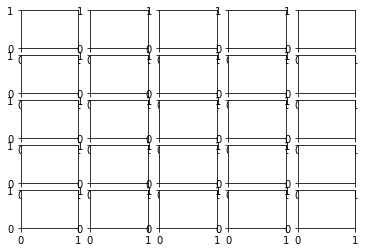

In [18]:
#
# Training the network
#
#tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)
parser = argparse.ArgumentParser(description='Process some integers.')
parser.add_argument('--train', help='train', action='store_true')
parser.add_argument('--epoch', help='epoch', const='int', nargs='?', default=5)
args, unknown = parser.parse_known_args()


model.fit(x_train, y_train, batch_size=512, epochs=20)
model.save_weights('weights_006.h5')


axes=[0 for _ in range(100)]
fig, axes = plt.subplots(5,5)

### Обнаружение объектов на тестовых изображениях

<ipython-input-19-3bcb7e3045f0>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(5,5,j+1)


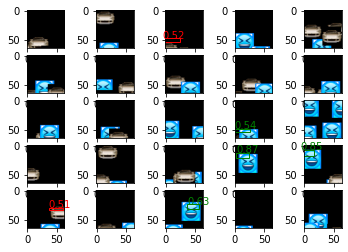

In [19]:
#
# Predict bounding box and classes for the first 25 images
#
for j in range(0,25):
    im = load_image(j)

    #
    # Predict bounding box and classes
    #
    img = cv2.imread('Images/%d.PNG' % j)
    #img = cv2.resize(img, (img_w,img_h))
    #data = img_to_array(img)
    P = model.predict(np.array([ img_to_array(img) ]))
 
    #
    # Draw each boxes and class score over each images using pyplot
    #
    col = 0
    for row in range(grid_w):
        for col in range(grid_h):
            p = P[0][col*grid_h+row]

            boxes = p[3:].reshape(nb_boxes,5)
            clss = np.argmax(p[0:2])
            
            ax = plt.subplot(5,5,j+1)
            imgplot = plt.imshow(img)

            i = 0
            for b in boxes:
                x = b[0]+float(row)
                y = b[1]+float(col)
                w = b[2]
                h = b[3]
                conf = b[4]
                if conf < 0.5:
                    continue

                color = ['r','g','b','0'][clss]
                rect = patches.Rectangle((x*cell_w-w/2*img_w, y*cell_h-h/2*img_h), w*img_h, h*img_h, linewidth=1,edgecolor=color,facecolor='none')
                #rect = patches.Rectangle((15, 15), 20, h*img_h, linewidth=1,edgecolor=color,facecolor='none')
                ax.add_patch(rect)

                ax.text( (x*cell_w-w/2*img_w) / img_w, 1-(y*cell_h-h/2*img_h)/img_h-i*0.15, "%0.2f" % (conf), transform=ax.transAxes, color=color)
                i+=1

plt.show()


